## Mortality (Bernoulli) likelihood Plots

You are trying to estimate the mortality rate $p$ of those in a hospital. Each patient's mortality is modelled by a Bernoulli distribution $X_i \sim B(\theta)$.

We observe 47 deaths and 53 survivals in a sample of 100 patients. Find the MLE (the $\theta$ that maximizes the likelihood of observing the data)

In [23]:
library(tidyverse)
# 1 = died, 0 = survived
p.true <- 0.47
# Repeated bernoulli trials -> binomial dist
obs <- rbinom(100, 1, true.p)
died <- sum(obs)
survived <- sum(!obs)
p.hat <- died/length(obs)

bernoulli.loglikelihood <- function(theta) sum(obs)*log(theta) + sum(1-obs)*log((1-theta))

In [25]:
thetas <- seq(0.00001,0.99999,0.001)
loglikelihoods <- bernoulli.loglikelihood(thetas)
res <- tibble(
    theta = thetas,
    loglikelihood = loglikelihoods)
res %>% filter(loglikelihood==max(loglikelihood))

theta,loglikelihood
<dbl>,<dbl>
0.53001,-69.13461


### Frequentist Inference

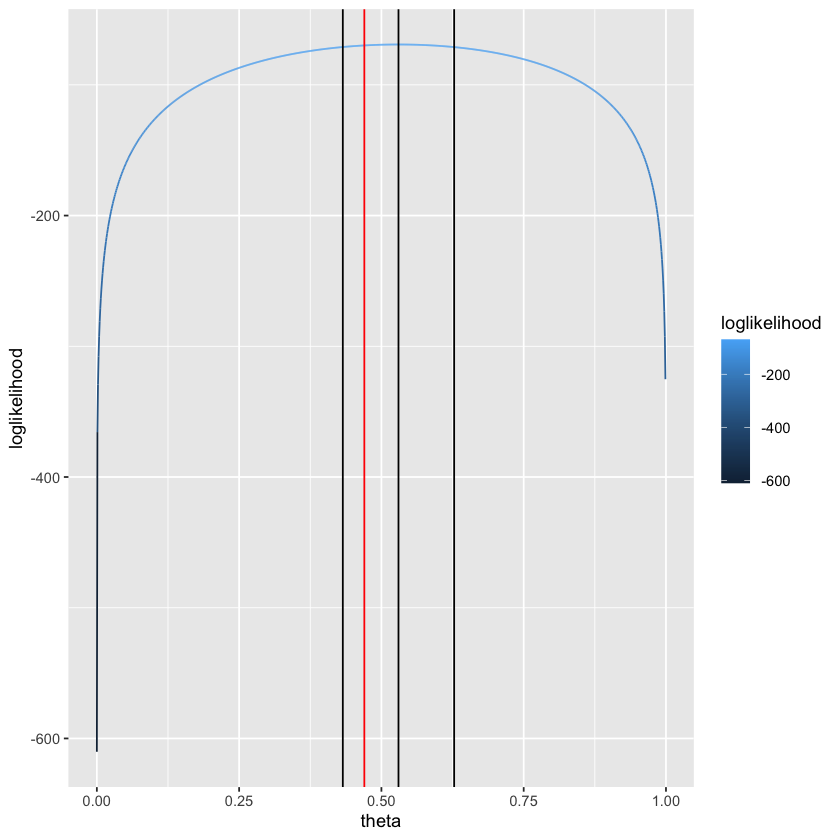

In [26]:
p.hat.variance <- p.hat * (1 - p.hat)
# 1.96 comes from CLT -> if we repeat this experiment a bunch the 
# estimate for p.hat will be normally distributed around p.true
p.hat.95.low = p.hat - 1.96 * sqrt(p.hat.variance / length(obs))
p.hat.95.high = p.hat + 1.96 * sqrt(p.hat.variance / length(obs))
res %>% 
    ggplot(aes(x=theta,y=loglikelihood,color=loglikelihood)) + 
    geom_line() +
    geom_vline(aes(xintercept = p.true),color='red') +
    geom_vline(aes(xintercept = p.hat)) +
    geom_vline(aes(xintercept = p.hat.95.low)) +
    geom_vline(aes(xintercept = p.hat.95.high))

In [27]:
paste("True proportion in confidence interval?",(p.true > p.hat.95.low) & (p.true < p.hat.95.high))

[1] "True proportion in confidence interval? TRUE"

## Exponential Likelihood Plot

$X$ is a random variable representing wait times at a call center following an exponential distribution. If the avg wait time is 4 minutes then $X_i \sim Exp(m)$ where $m=1/\mu$

In [56]:
# Average wait time is 4 minutes
mu.true <- 4
lambda.true <- 1/mu.true
# Sample wait times
obs <- rexp(1000, rate = lambda.true)
mu.hat <- mean(obs)
lambda.hat <- 1/mu.hat
mu.hat

[1] 3.765706

In [57]:
exp.loglikelihood <- function(lambda) length(obs) * log(lambda) - sum(obs) * lambda
res2 <- tibble(mu = seq(1,10,0.1)) %>%
    mutate(
        lambda = 1/mu,
        loglikelihood = exp.loglikelihood(lambda))
res2 %>% filter(loglikelihood==max(loglikelihood))

mu,lambda,loglikelihood
<dbl>,<dbl>,<dbl>
3.8,0.2631579,-2325.976


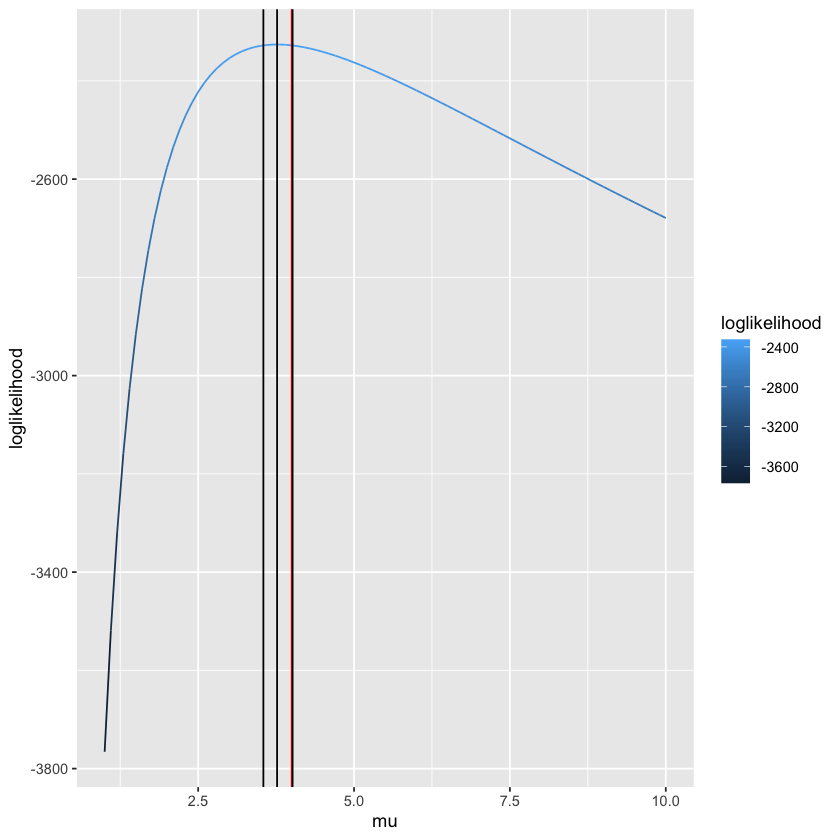

In [58]:
lambda.hat.variance <- 1 / (lambda.hat^2)
# 1.96 comes from CLT -> if we repeat this experiment a bunch the 
# estimate for p.hat will be normally distributed around p.true
lambda.95.low <- lambda.hat * (1 - 1.96 / sqrt(length(obs)))
lambda.95.high <- lambda.hat * (1 + 1.96 / sqrt(length(obs)))
mu.95.low <- 1 / lambda.95.low
mu.95.high <- 1 / lambda.95.high
res2 %>% 
    ggplot(aes(x=mu,y=loglikelihood,color=loglikelihood)) + 
    geom_line() + 
    geom_vline(aes(xintercept = mu.true),color='red') +
    geom_vline(aes(xintercept = mu.hat)) +
    geom_vline(aes(xintercept = mu.95.low)) +
    geom_vline(aes(xintercept = mu.95.high))